# World Population Analysis


This is World Population Dataset which covers 
the number of population in each country in the world,Area of each country and the Growth Rate of population.
The World Population Data are collected from 1970 to 2022.

------------------------------------------------------------------------------

# Highlights of The Notebook


-in this notebook we will focus on the Growth Rate of population and which county has Population increase
and more.


**************************************************************************************************************************

In [155]:
!pip install missingno


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [156]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Importing Data

In [217]:
world_population = pd.read_csv('world_population.csv')

In [218]:
world_population

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


**At first let's check f there is any missing Values.**

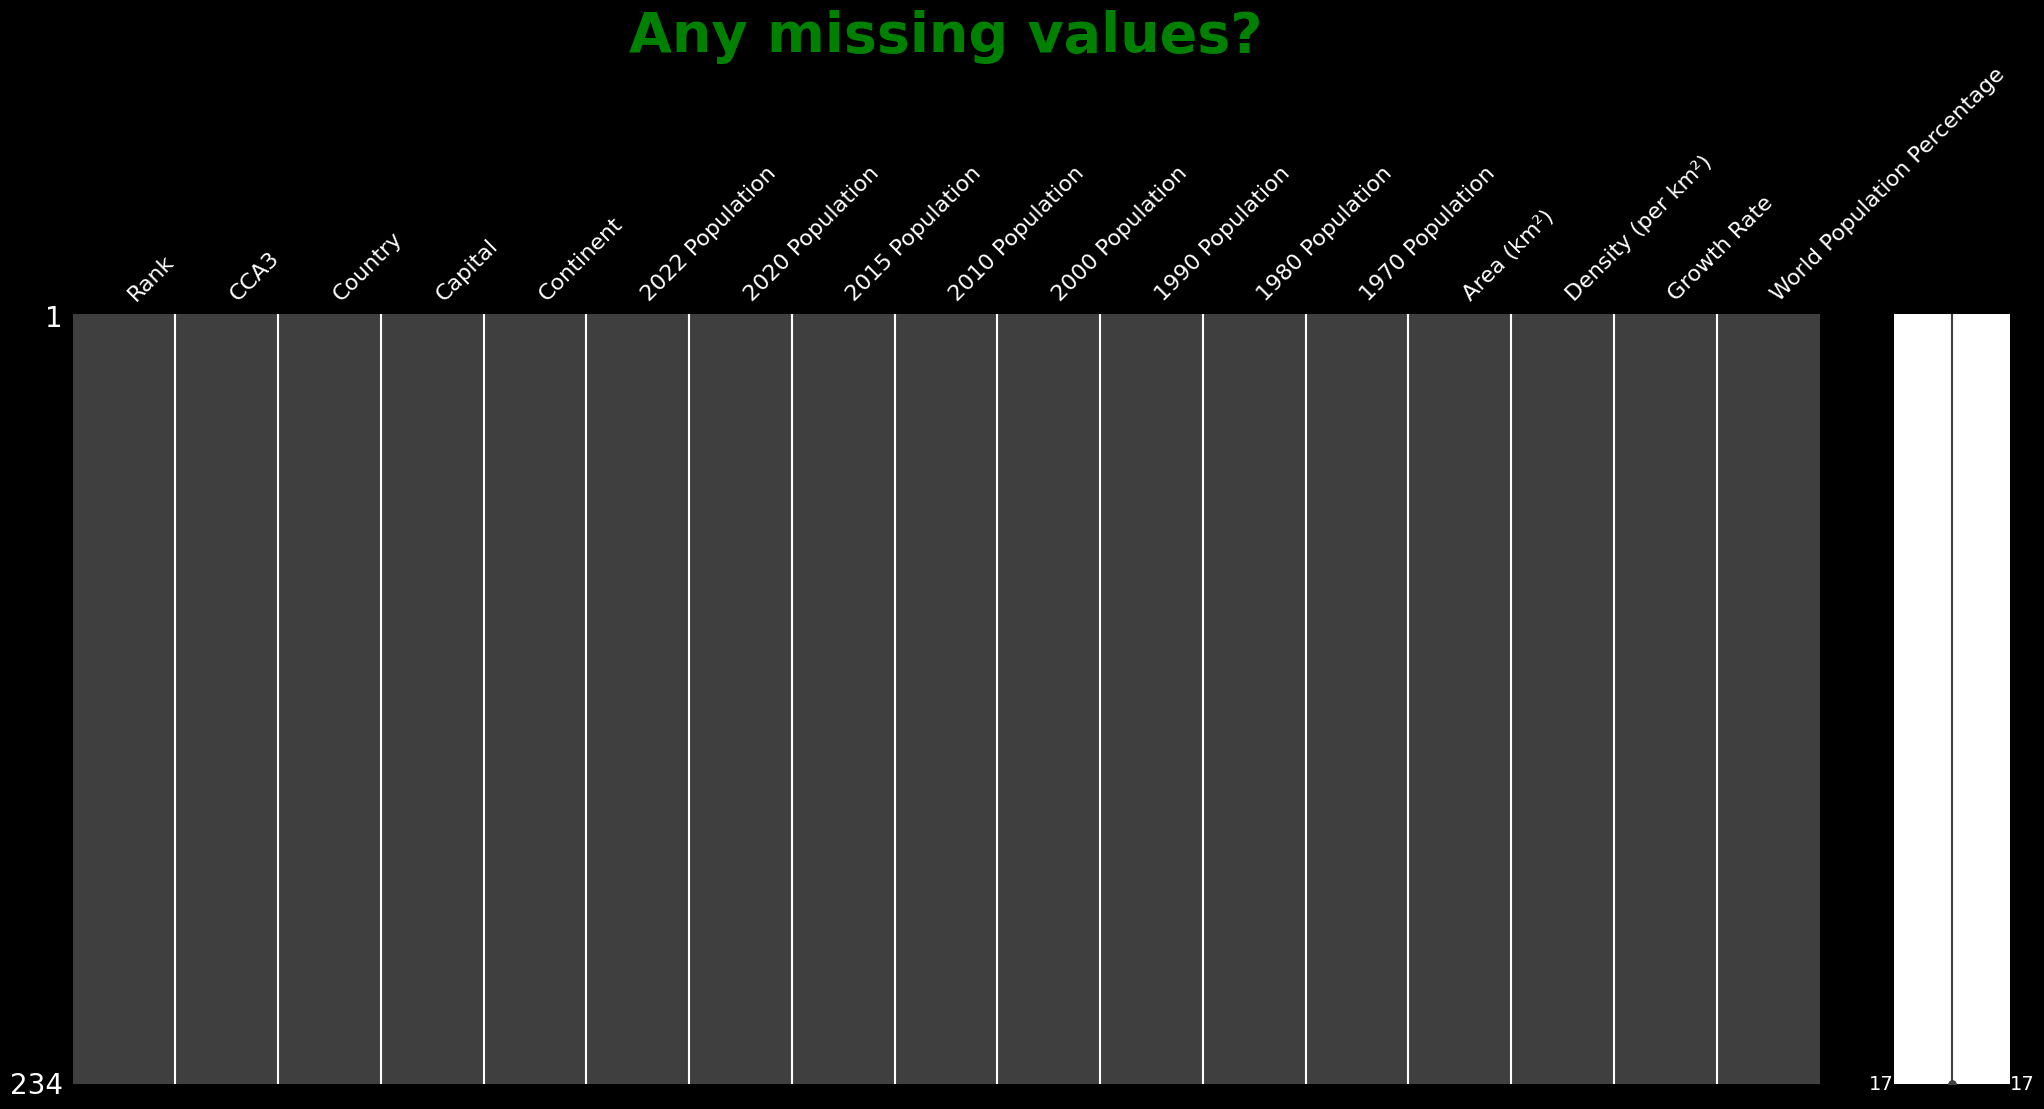

In [219]:
msno.matrix(world_population);
plt.title('Any missing values?', size=40, fontweight='bold' ,color="green");

this figuer show there isn't missing values

# ***Data Preparation and Cleaning***

In [220]:
world_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [221]:
world_population.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


In [222]:
world_population.columns

Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

In [223]:
world_population.shape

(234, 17)

**From the previous cells we can see that our data contains 234 columns and 17 rows 
and It is also clear to us that this data does not contain any non values, but let's make sure**

In [224]:
world_population.isnull()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
230,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
231,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
232,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**The Dataframe doesn't has any Non Values.**

In [225]:
population_distribution = world_population['Density (per km²)'] / world_population['Area (km²)']
population_distribution

0      0.000097
1      0.003439
2      0.000008
3      1.117977
4      0.364453
         ...   
229    0.573894
230    0.000008
231    0.000121
232    0.000035
233    0.000107
Length: 234, dtype: float64

**After Calculating The Distribution of Population in Each Country, Let's add this column to the DataFrame.***

In [226]:
world_population['population_distribution'] = population_distribution

In [227]:
world_population

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,population_distribution
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52,0.000097
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04,0.003439
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56,0.000008
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00,1.117977
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00,0.364453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00,0.573894
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01,0.000008
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42,0.000121
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25,0.000035


# ***Exploratory Analysis and Visualization***

In [228]:
world_population.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,population_distribution
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52,0.000097
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04,0.003439
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56,0.000008
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00,1.117977
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00,0.364453


In [229]:
data_heatmap = world_population.corr()
data_heatmap

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6588\4072056378.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_heatmap = world_population.corr()


,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,population_distribution
Rank,1.000000,-0.358361,-0.355854,-0.351222,-0.347461,-0.341057,-0.336152,-0.335246,-0.335379,-0.383774,0.129436,-0.224561,-0.358464,0.117897
2022 Population,-0.358361,1.000000,0.999946,0.999490,0.998629,0.994605,0.987228,0.980285,0.973162,0.453411,-0.027618,-0.020863,0.999999,-0.020482
2020 Population,-0.355854,0.999946,1.000000,0.999763,0.999105,0.995583,0.988724,0.982121,0.975254,0.454993,-0.027358,-0.025116,0.999944,-0.020311
2015 Population,-0.351222,0.999490,0.999763,1.000000,0.999783,0.997340,0.991594,0.985724,0.979414,0.458240,-0.026857,-0.032154,0.999487,-0.020003
2010 Population,-0.347461,0.998629,0.999105,0.999783,1.000000,0.998593,0.993929,0.988786,0.983042,0.461936,-0.026505,-0.037983,0.998626,-0.019753
2000 Population,-0.341057,0.994605,0.995583,0.997340,0.998593,1.000000,0.998336,0.995160,0.990956,0.473933,-0.026139,-0.050515,0.994598,-0.019337
1990 Population,-0.336152,0.987228,0.988724,0.991594,0.993929,0.998336,1.000000,0.999042,0.996602,0.486764,-0.026224,-0.062397,0.987218,-0.019086
1980 Population,-0.335246,0.980285,0.982121,0.985724,0.988786,0.995160,0.999042,1.000000,0.999194,0.498166,-0.026587,-0.072349,0.980273,-0.019087
1970 Population,-0.335379,0.973162,0.975254,0.979414,0.983042,0.990956,0.996602,0.999194,1.000000,0.509940,-0.026881,-0.081313,0.973150,-0.019142
Area (km²),-0.383774,0.453411,0.454993,0.458240,0.461936,0.473933,0.486764,0.498166,0.509940,1.000000,-0.063128,-0.013970,0.453284,-0.027202


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6588\3190711902.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(world_population.corr(), fmt=".01g", annot=True, cmap='Greens');


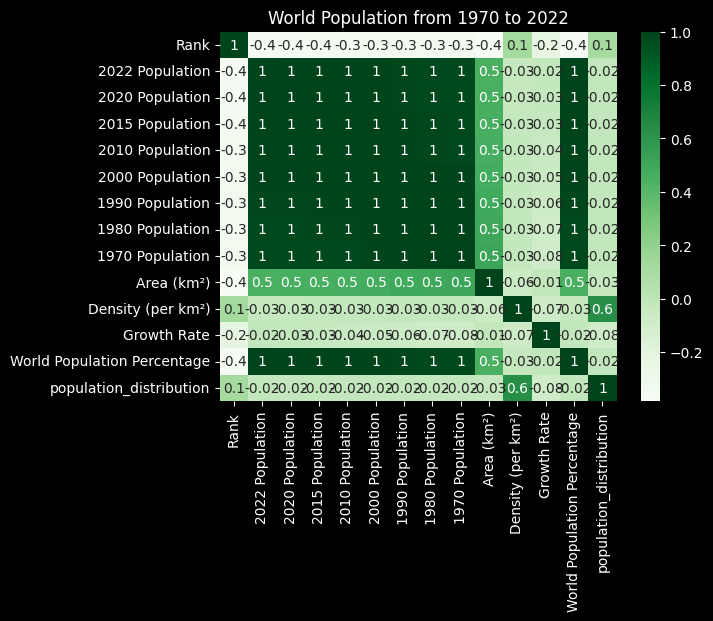

In [230]:
plt.title("World Population from 1970 to 2022")
sns.heatmap(world_population.corr(), fmt=".01g", annot=True, cmap='Greens');

# ***Ask & answer questions about the data***
***Q1: Which Countries have the largest population?***

In [231]:
world_population.set_index("Country", inplace=True)

<AxesSubplot: title={'center': 'Countries with Largest Population'}, xlabel='Country', ylabel='No.Population'>

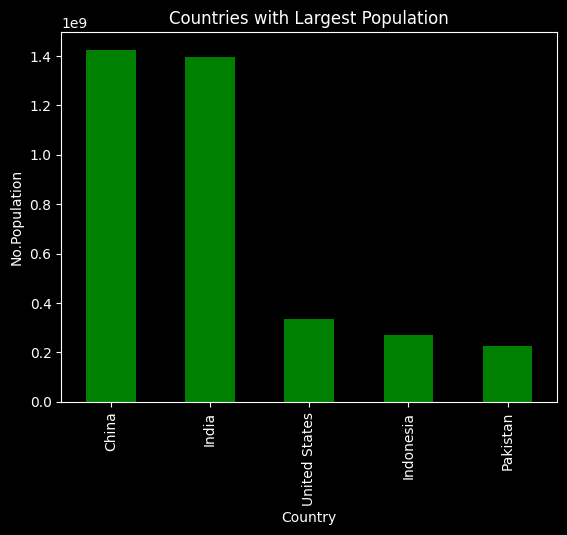

In [232]:
plt.title('Countries with Largest Population')
plt.xlabel("Country")
plt.ylabel("No.Population")
world_population['2020 Population'].nlargest().plot(kind = "bar" ,color="green")

in the previos plot that represents Counries with the largest population, we can see that China and India 
have the most number of people and Pakistan has the smallest, X-Axis represents names of Countries and Y-Axis represent
how many people each country has.

**From The previos Bars we can see that China and India have the Largest Population**

***Q2: Which country with the biggest Density? India or China?***

In [233]:
india = (world_population.loc["India"])["Density (per km²)"]
china = (world_population.loc["China"])["Density (per km²)"]
print("The Density in India = " ,india)
print("The Density in China = " ,china)

The Density in India =  431.0675
The Density in China =  146.8933


**From The Previous equations and Calculations we can see that The biggest density is India**

In [234]:
area1 = (world_population.loc["India"])["Area (km²)"]
area2 = (world_population.loc["China"])["Area (km²)"]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6588\591238697.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-g" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(countries,area, "-g" , linewidth=5 ,linestyle="solid")


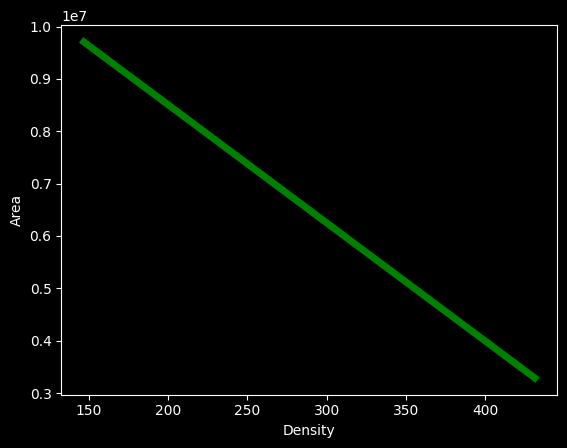

In [235]:
countries = [india,china]
area = [area1,area2]
plt.xlabel("Density")
plt.ylabel("Area")
plt.plot(countries,area, "-g" , linewidth=5 ,linestyle="solid")
plt.show()

from previous plot we can observe when the density is increase area is decrease and it is very logical.

***Q3: What do you predict for the Density in the next four years?***

In [236]:
population_2030 = world_population["2020 Population"] * (world_population["Growth Rate"] ** 10)
population_2040 = world_population["2020 Population"] * (world_population["Growth Rate"] ** 20)
population_2050 = world_population["2020 Population"] * (world_population["Growth Rate"] ** 30)
population_2060 = world_population["2020 Population"] * (world_population["Growth Rate"] ** 40)
print("The Density in 2030 is " , population_2030)
print("The Density in 2040 is " , population_2040)
print("The Density in 2050 is " , population_2050)
print("The Density in 2060 is " , population_2060)

The Density in 2030 is  Country
Afghanistan          5.022950e+07
Albania              2.745933e+06
Algeria              5.112732e+07
American Samoa       3.895072e+04
Andorra              8.582914e+04
                         ...     
Wallis and Futuna    1.111866e+04
Western Sahara       6.672617e+05
Yemen                4.001491e+07
Zambia               2.494763e+07
Zimbabwe             1.917627e+07
Length: 234, dtype: float64
The Density in 2040 is  Country
Afghanistan          6.473846e+07
Albania              2.630116e+06
Algeria              6.015885e+07
American Samoa       3.284676e+04
Andorra              9.480877e+04
                         ...     
Wallis and Futuna    1.060699e+04
Western Sahara       8.007189e+05
Yemen                4.959705e+07
Zambia               3.288217e+07
Zimbabwe             2.346760e+07
Length: 234, dtype: float64
The Density in 2050 is  Country
Afghanistan          8.343839e+07
Albania              2.519185e+06
Algeria              7.078580e+0

**Let's add this prediction as columns in our dataframe**

In [237]:
world_population["population_2030"] = population_2030
world_population["population_2040"] = population_2040
world_population["population_2050"] = population_2050
world_population["population_2060"] = population_2060

In [238]:
world_population

,Rank,CCA3,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,...,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,population_distribution,population_2030,population_2040,population_2050,population_2060
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,36,AFG,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,...,10752971,652230,63.0587,1.0257,0.52,0.000097,5.022950e+07,6.473846e+07,8.343839e+07,1.075399e+08
Albania,138,ALB,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,...,2324731,28748,98.8702,0.9957,0.04,0.003439,2.745933e+06,2.630116e+06,2.519185e+06,2.412932e+06
Algeria,34,DZA,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,...,13795915,2381741,18.8531,1.0164,0.56,0.000008,5.112732e+07,6.015885e+07,7.078580e+07,8.328997e+07
American Samoa,213,ASM,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,...,27075,199,222.4774,0.9831,0.00,1.117977,3.895072e+04,3.284676e+04,2.769934e+04,2.335858e+04
Andorra,203,AND,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,...,19860,468,170.5641,1.0100,0.00,0.364453,8.582914e+04,9.480877e+04,1.047279e+05,1.156847e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,226,WLF,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,...,9377,142,81.4930,0.9953,0.00,0.573894,1.111866e+04,1.060699e+04,1.011888e+04,9.653225e+03
Western Sahara,172,ESH,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,...,76371,266000,2.1654,1.0184,0.01,0.000008,6.672617e+05,8.007189e+05,9.608686e+05,1.153049e+06
Yemen,46,YEM,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,...,6843607,527968,63.8232,1.0217,0.42,0.000121,4.001491e+07,4.959705e+07,6.147376e+07,7.619451e+07


**let's see what happen to Population in India and China**

In [239]:
india_population_2030 = (world_population.loc["India"])["population_2030"]
China_population_2030 = (world_population.loc["China"])["population_2030"]
india_population_2040 = (world_population.loc["India"])["population_2040"]
China_population_2040 = (world_population.loc["China"])["population_2040"]
india_population_2050 = (world_population.loc["India"])["population_2050"]
China_population_2050 = (world_population.loc["China"])["population_2050"]
india_population_2060 = (world_population.loc["India"])["population_2060"]
China_population_2060 = (world_population.loc["China"])["population_2060"]

In [240]:
indiapopulation = [india_population_2030,india_population_2040,india_population_2050,india_population_2060]
years = [2030,2040,2050,2060]
chinapopulation = [China_population_2030,China_population_2040,China_population_2050,China_population_2060]

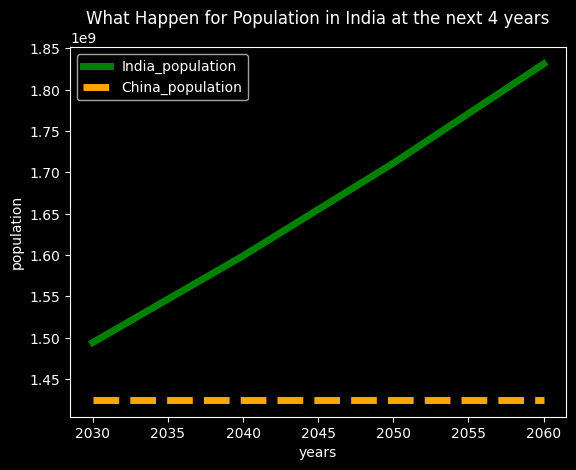

In [241]:
plt.style.use("dark_background")
plt.title("What Happen for Population in India at the next 4 years")
plt.plot(years,indiapopulation ,color="g" ,linewidth=5 ,linestyle="solid" ,label="India_population")
plt.plot(years,chinapopulation ,color="orange" ,linewidth=5 ,linestyle="--" ,label="China_population")
plt.xlabel("years")
plt.ylabel("population")
plt.legend()
plt.show()

**from the previous plots We can see that at the last 4 years India population will increase over China with a big Difference
and China's Population will be fixed as shown in the figure. **

***Q4: What is total population in each Country?*** 

In [242]:
total_2060 = world_population['population_2060'].sum()
total_2050 = world_population['population_2050'].sum()
total_2040 = world_population['population_2040'].sum()
total_2030 = world_population['population_2030'].sum()
total_2020 = world_population['2020 Population'].sum()
total_2010 = world_population['2010 Population'].sum()
total_2000 = world_population['2000 Population'].sum()
total_1990 = world_population['1990 Population'].sum()
total_1980 = world_population['1980 Population'].sum()
total_1970 = world_population['1970 Population'].sum()

In [243]:
world = [total_1970,total_1980,total_1990,total_2000,total_2010,total_2020,total_2030,total_2040,
         total_2050,total_2060]
year = [1970,1980,1990,2000,2010,2020,2030,2040,2050,2060]

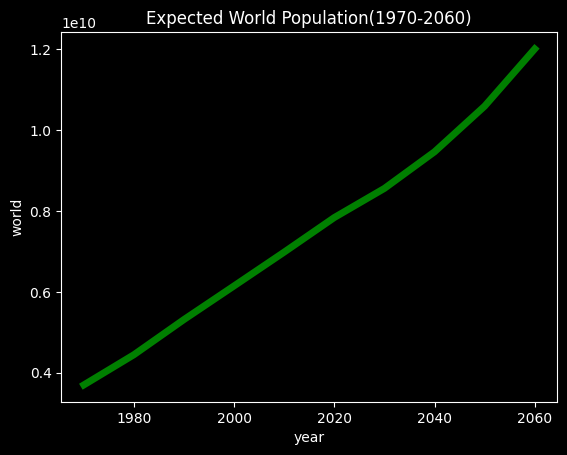

In [244]:
plt.style.use("dark_background")
plt.title("Expected World Population(1970-2060)")
plt.plot(year,world ,color="g" ,linewidth=5 ,linestyle="solid")
plt.xlabel("year")
plt.ylabel("world")
plt.show()

From Previous plot The expectation is that the world population keeps on growing.

***Q5: What is The total number of Countries in a Continent?***

Text(117.09722222222221, 0.5, 'No. of Countries')

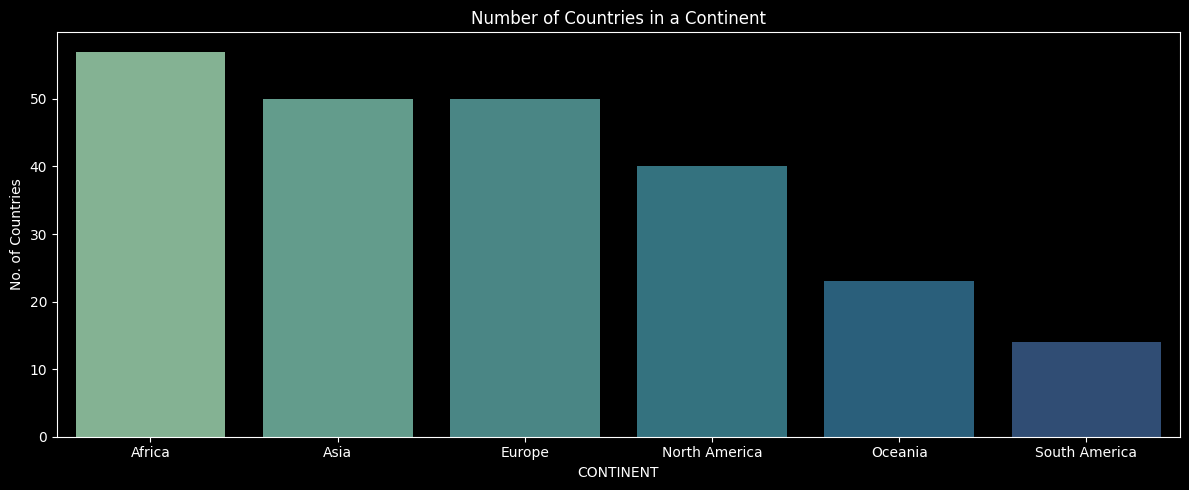

In [245]:
plt.figure(figsize= (12,5))
plt.title("Number of Countries in a Continent")
sns.countplot(x = 'Continent', data = world_population.sort_values(by = 'Continent', ascending = True), palette= 'crest')
plt.tight_layout()
plt.xlabel('CONTINENT')
plt.ylabel('No. of Countries')

this plot describe the number of countres in each Continent and this show that Africa has the lagest amount of countries 
then Asiaand Europe, Asia and Europe have the same amount of Countries and South America has the smallest amount of countries.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6588\3199809616.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  continent_rank=world_population.groupby(by="Continent").sum().sort_values(by="2022 Population",ascending=False)


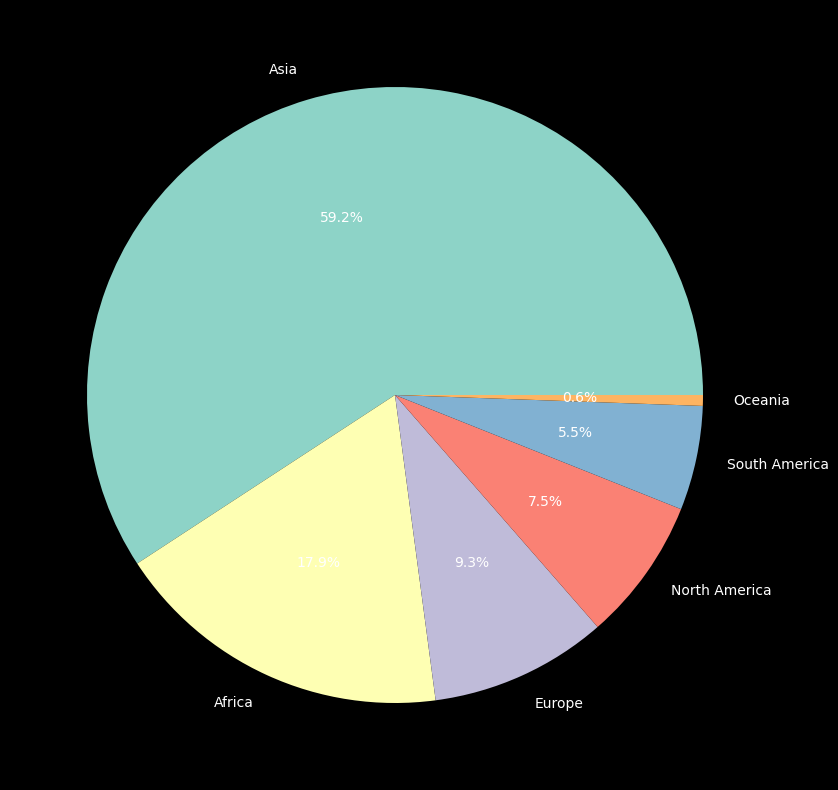

In [252]:
continent_rank=world_population.groupby(by="Continent").sum().sort_values(by="2022 Population",ascending=False)
fig, ax = plt.subplots(figsize =(15, 10))
x=continent_rank.index
y=continent_rank["2022 Population"]
plt.pie(y,labels=x,autopct='%1.1f%%')
plt.show()

The previous chart shows that Asia is the most Population Continent and Ociena is the smallest.

***Q6: What is The World Population Percentage?***

*at first let's find the population percentage of each continent*

In [253]:
continent_data_percentage = world_population.groupby('Continent')['World Population Percentage'].sum().sort_values(ascending= False).reset_index()
continent_data_percentage

,Continent,World Population Percentage
0,Asia,59.19
1,Africa,17.87
2,Europe,9.33
3,North America,7.51
4,South America,5.48
5,Oceania,0.55


***Explanation of The Functions I uesed.***


**GroupBy():is used to split the data into groups based on some criteria.**

    
**Sum(): is usef fo calculating total.**


**sort():is used to sort elements in ascending or decending order based on your condition.***
    
**reset_index(): is used if the DataFrame has a MultiIndex.**

In [248]:
Continent_percentage= continent_data_percentage['Continent']
Continent_percentage

0             Asia
1           Africa
2           Europe
3    North America
4    South America
5          Oceania
Name: Continent, dtype: object

In [249]:
population_percentage = world_population["World Population Percentage"]
population_percentage

Country
Afghanistan          0.52
Albania              0.04
Algeria              0.56
American Samoa       0.00
Andorra              0.00
                     ... 
Wallis and Futuna    0.00
Western Sahara       0.01
Yemen                0.42
Zambia               0.25
Zimbabwe             0.20
Name: World Population Percentage, Length: 234, dtype: float64

# Inferences and Conclusion

**From The previous Visualization and Analysing we Can Concluse that:**
* Number of Population in the world will be Increase.
* Based on this increasing, Area of Agricultural land will be decrease and will be used in building.
* Number of Bectera and viruses will be increase and it will be lead to spread of disease.
* Based on Population increasing, Resources will be decrease and to avoid that each country should be work hard to produce more
and more.
* Increase in Wars and Famines.

# Future Work

* More pretty seaborn graph.
* Use Maps.

# References

* https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset